In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/home/sdybing/gnss-picker/cnn_models_outputs/newfault_fq_train/models/traindate_2024-10-01/data/'

In [3]:
# data = np.load(path + '2024-10-15_gfast_fqtest_orig_data.npy')
# metadata = np.load(path + 'pgd_test_metadata_with_hypdists.npy')

data = np.load(path + '2024-10-16_gfast_bigger_fqtest_orig_data.npy')
metadata = np.load(path + 'pgd_bigger_test_metadata_w_hypdist_pgd_snrs.npy')

# np.save(data_save_dir + str(fqtestdate) + '_gfast_fqtest_target.npy', fqtest_target)
# np.save(data_save_dir + str(fqtestdate) + '_gfast_fqtest_predictions.npy', fqtest_predictions)

# Columns:

# 0: FQ rupture name
# 1: station name
# 2: magnitude
# 3: P-arrival index
# 4: FQ rupture hypocenter lat
# 5: FQ rupture hypocenter lon
# 6: FQ rupture hypocenter depth (km)
# 7: station lat
# 8: station lon
# 9: hypocentral distance (m)
# 10. PGD (m)
# 11. SNRN
# 12. SNRE
# 13. SNRZ
# 14. mean SNR

In [4]:
data.shape

(20683, 128, 3)

In [5]:
metadata.shape

(20683, 15)

In [6]:
metadata[0]

array(['newfault.001022', 'IMPS', '6.2624', '41', '35.692601',
       '-117.545871', '0.8', '34.157563', '-115.1451',
       '277688.3029341335', '0.032603726320516765', '0.7236803233026459',
       '0.9830943827024764', '0.7413362985838914', '0.8160370015296712'],
      dtype='<U32')

In [7]:
# Crowell 2016 used PGD in cm, Rhyp in km 
# log10(PGD) = A + B*Mw + C*Mw*log10(Rhyp)
A = -6.687
B = 1.5
C = -0.214

pgd_ts_array = np.zeros((len(data), 128))
Mw_ts_array = np.zeros((len(data), 128))

for idx in range(len(data)):
    
    n = data[idx, :, 0]*100 # converting disp from m to cm
    e = data[idx, :, 1]*100
    z = data[idx, :, 2]*100
    
    Rhyp = float(metadata[idx,9])/1000
    actual_Mw = float(metadata[idx,2])
#     print(Rhyp)
    
#     plt.plot(n)
#     plt.plot(e)
#     plt.plot(z)
    
    pgd_ts = np.sqrt(n**2 + e**2 + z**2)
#     plt.plot(pgd_ts)
#     plt.show()
    
    Mw_ts = (np.log10(pgd_ts) - A) / (B + C * np.log10(Rhyp))
    
#     plt.plot(Mw_ts)
#     plt.show()
    
    pgd_ts_array[idx] = pgd_ts
    Mw_ts_array[idx] = Mw_ts
    
#     print(actual_Mw, np.max(Mw_ts))

In [16]:
all_calc_mws = []

for k in range(len(Mw_ts_array)):
    
    calc_Mw = np.max(Mw_ts_array[k])
    all_calc_mws.append(calc_Mw)

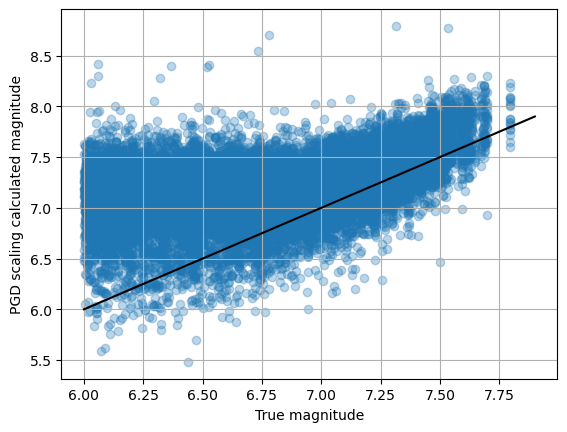

In [17]:
all_true_mws = metadata[:,2].astype(float)

x = np.arange(6,8,0.1)
plt.grid()
plt.scatter(all_true_mws, all_calc_mws, alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')

plt.show();

In [18]:
# Get residuals

all_resids = []

for i in range(len(all_true_mws)):
    
    true_mw = all_true_mws[i]
    calc_mw = all_calc_mws[i]
    
    resid = true_mw - calc_mw
    all_resids.append(resid)

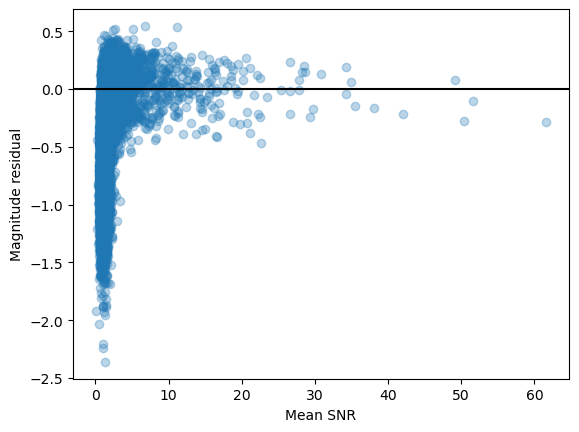

In [26]:
mean_SNRs = metadata[:,14].astype(float)

plt.scatter(mean_SNRs, all_resids, alpha = 0.3)
plt.axhline(y = 0, color = 'black')
plt.xlabel('Mean SNR')
plt.ylabel('Magnitude residual')

plt.show();

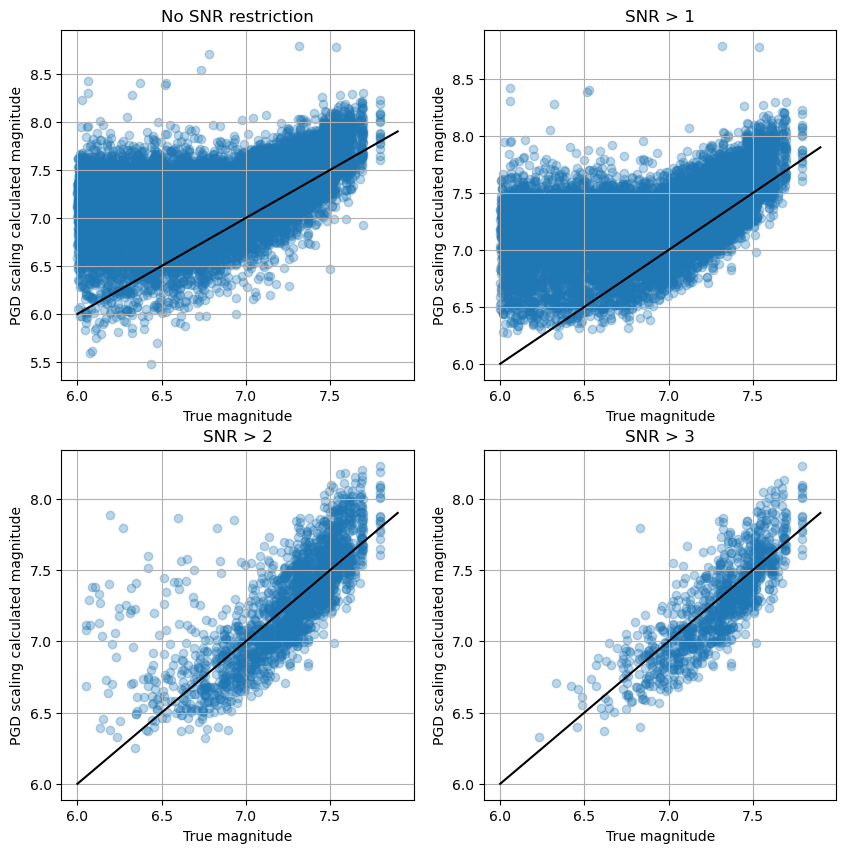

In [35]:
# Restricting plot by SNR

plt.figure(figsize = (10,10), dpi = 100)

x = np.arange(6,8,0.1)

plt.subplot(221)
all_true_mws = metadata[:,2].astype(float)
plt.grid()
plt.scatter(all_true_mws, all_calc_mws, alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')
plt.title('No SNR restriction')

plt.subplot(222)
k = np.where(mean_SNRs > 1)[0]
resids_SNR2 = np.array(all_resids)[k]
plt.grid()
plt.scatter(all_true_mws[k], np.array(all_calc_mws)[k], alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')
plt.title('SNR > 1')

plt.subplot(223)
k = np.where(mean_SNRs > 2)[0]
resids_SNR2 = np.array(all_resids)[k]
plt.grid()
plt.scatter(all_true_mws[k], np.array(all_calc_mws)[k], alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')
plt.title('SNR > 2')

plt.subplot(224)
k = np.where(mean_SNRs > 3)[0]
resids_SNR2 = np.array(all_resids)[k]
plt.grid()
plt.scatter(all_true_mws[k], np.array(all_calc_mws)[k], alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')
plt.title('SNR > 3')

plt.show();

In [10]:
# Event-average PGD magnitude

In [11]:
uni_rupts = np.unique(metadata[:,0])
print(uni_rupts)

['newfault.000000' 'newfault.000001' 'newfault.000002' ...
 'newfault.001748' 'newfault.001776' 'newfault.001779']


In [55]:
true_mws = []
calc_mws_none = []
calc_mws_1 = []
calc_mws_2 = []
calc_mws_3 = []

for idx2 in range(len(uni_rupts)):
    
    rupt = uni_rupts[idx2]
#     print(rupt)
    
    i = np.where(metadata[:,0] == rupt)[0]
#     print(metadata[i])
    
    mws_none = []
    mws_1 = []
    mws_2 = []
    mws_3 = []
    for index in i:
        computed_mw = np.max(Mw_ts_array[index])
        mws_none.append(computed_mw)
        SNR = float(metadata[index,14])
#         print('SNR: ' + str(SNR))
        if SNR > 1:
#             print(computed_mw)
            mws_1.append(computed_mw)
        if SNR > 2:
#             print(computed_mw)
            mws_2.append(computed_mw)
        if SNR > 3:
#             print(computed_mw)
            mws_3.append(computed_mw)
    
#     print(mws_3)
    
    try:
        evt_avg_mean_Mw_none = np.mean(np.array(mws_none))
    except: 
        evt_avg_mean_Mw_none = np.nan
    try:
        evt_avg_mean_Mw_1 = np.mean(np.array(mws_1))
    except: 
        evt_avg_mean_Mw_1 = np.nan
    try:
        evt_avg_mean_Mw_2 = np.mean(np.array(mws_2))
    except: 
        evt_avg_mean_Mw_2 = np.nan
    try:
        evt_avg_mean_Mw_3 = np.mean(np.array(mws_3))
    except: 
        evt_avg_mean_Mw_3 = np.nan
    
    true_Mw = float(metadata[i,2][0])
    
    true_mws.append(true_Mw)
    calc_mws_none.append(evt_avg_mean_Mw_none)
    calc_mws_1.append(evt_avg_mean_Mw_1)
    calc_mws_2.append(evt_avg_mean_Mw_2)
    calc_mws_3.append(evt_avg_mean_Mw_3)
    
#     print(true_Mw)
#     print(evt_avg_mean_Mw)


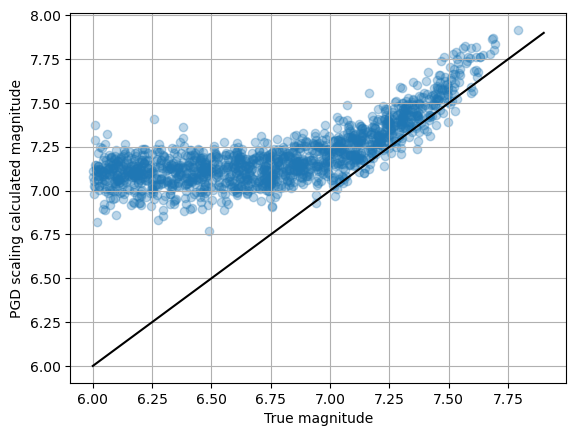

In [56]:
x = np.arange(6,8,0.1)
plt.grid()
plt.scatter(true_mws, calc_mws_none, alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')

plt.show();

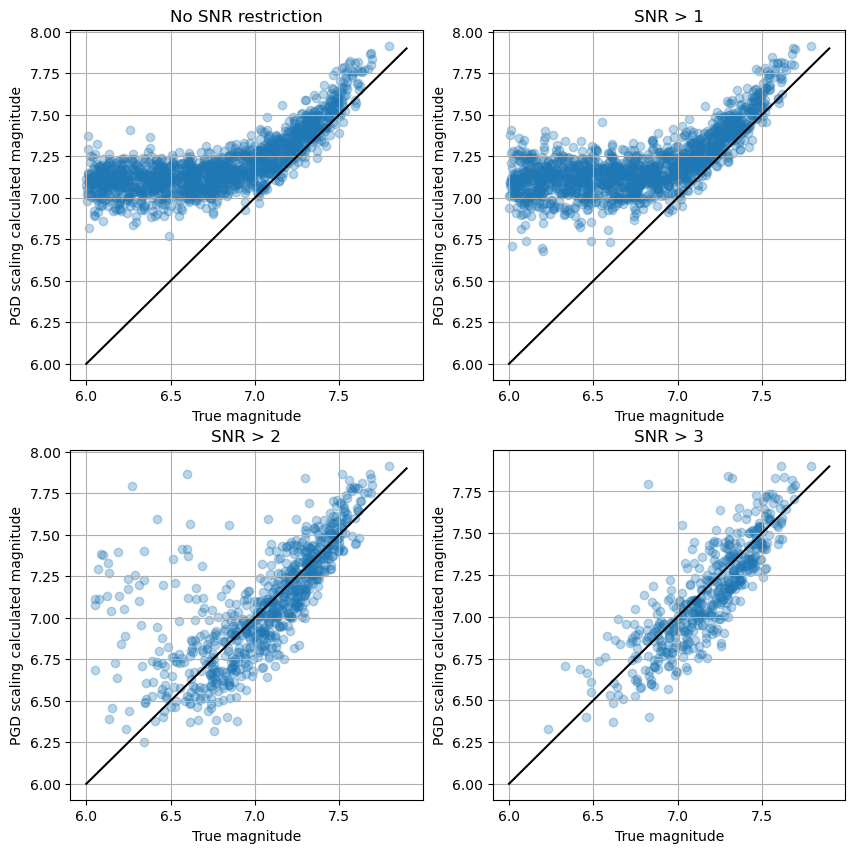

In [57]:
# Restricting event-average plot by SNR

plt.figure(figsize = (10,10), dpi = 100)

x = np.arange(6,8,0.1)

plt.subplot(221)
plt.grid()
plt.scatter(true_mws, calc_mws_none, alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')
plt.title('No SNR restriction')

plt.subplot(222)
plt.grid()
plt.scatter(true_mws, calc_mws_1, alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')
plt.title('SNR > 1')

plt.subplot(223)
plt.grid()
plt.scatter(true_mws, calc_mws_2, alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')
plt.title('SNR > 2')

plt.subplot(224)
plt.grid()
plt.scatter(true_mws, calc_mws_3, alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')
plt.title('SNR > 3')

plt.show();

In [76]:
# Only works after running code 7

# results = np.load(path + 'pgd_bigger_test_metadata_w_hypdist_pgd_snrs_result0135.npy') # Best accuracy threshold from FQ testing data
results = np.load(path + 'pgd_bigger_test_metadata_w_hypdist_pgd_snrs_result0835.npy') # Best precision threshold from FQ testing data
results.shape

(20683, 16)

In [77]:
p = np.where(results[:,15] == 'false neg')[0]
print(len(p))
q = np.where(results[:,15] == 'true pos')[0]
print(len(q))

14857
5826


In [78]:
len(all_calc_mws)

20683

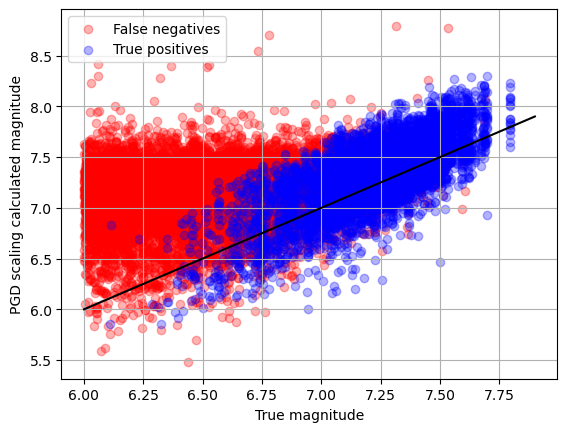

In [81]:
all_true_mws = metadata[:,2].astype(float)
all_calc_mws = np.array(all_calc_mws)

fn_all_true_mws = all_true_mws[p]
fn_all_calc_mws = all_calc_mws[p]
tp_all_true_mws = all_true_mws[q]
tp_all_calc_mws = all_calc_mws[q]

x = np.arange(6,8,0.1)
plt.grid()
plt.scatter(fn_all_true_mws, fn_all_calc_mws, color = 'red', alpha = 0.3, label = 'False negatives')
plt.scatter(tp_all_true_mws, tp_all_calc_mws, color = 'blue', alpha = 0.3, label = 'True positives')
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')
plt.legend()

plt.show();

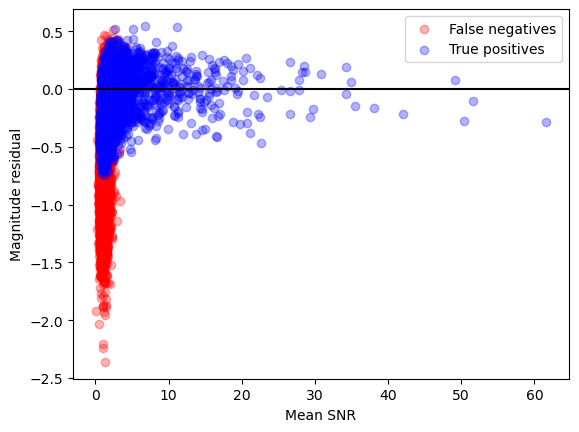

In [82]:
mean_SNRs = results[:,14].astype(float)

fn_mean_SNRs = mean_SNRs[p]
tp_mean_SNRs = mean_SNRs[q]
fn_all_resids = np.array(all_resids)[p]
tp_all_resids = np.array(all_resids)[q]

plt.scatter(fn_mean_SNRs, fn_all_resids, color = 'red', alpha = 0.3, label = 'False negatives')
plt.scatter(tp_mean_SNRs, tp_all_resids, color = 'blue', alpha = 0.3, label = 'True positives')
plt.axhline(y = 0, color = 'black')
plt.xlabel('Mean SNR')
plt.ylabel('Magnitude residual')
plt.legend()

plt.show();

In [88]:
true_mws = []
calc_mws_fn = []
calc_mws_tp = []

for idx2 in range(len(uni_rupts)):
    
    rupt = uni_rupts[idx2]
#     print(rupt)
    
    i = np.where(results[:,0] == rupt)[0]
#     print(metadata[i])
    
    mws_tp = []
    mws_fn = []
    for index in i:
        computed_mw = np.max(Mw_ts_array[index])
        mws_none.append(computed_mw)
        result = results[index,15]
#         print('Result: ' + result)
        if result == 'true pos':
            mws_tp.append(computed_mw)
        else:
            mws_fn.append(computed_mw)
    
    try:
        evt_avg_mean_Mw_tp = np.mean(np.array(mws_tp))
    except:
        evt_avg_mean_Mw_tp = np.nan
    try:
        evt_avg_mean_Mw_fn = np.mean(np.array(mws_fn))
    except:
        evt_avg_mean_Mw_fn = np.nan
    
    true_Mw = float(metadata[i,2][0])
    
    true_mws.append(true_Mw)
    calc_mws_fn.append(evt_avg_mean_Mw_fn)
    calc_mws_tp.append(evt_avg_mean_Mw_tp)
    
#     print(true_Mw)
#     print(evt_avg_mean_Mw)


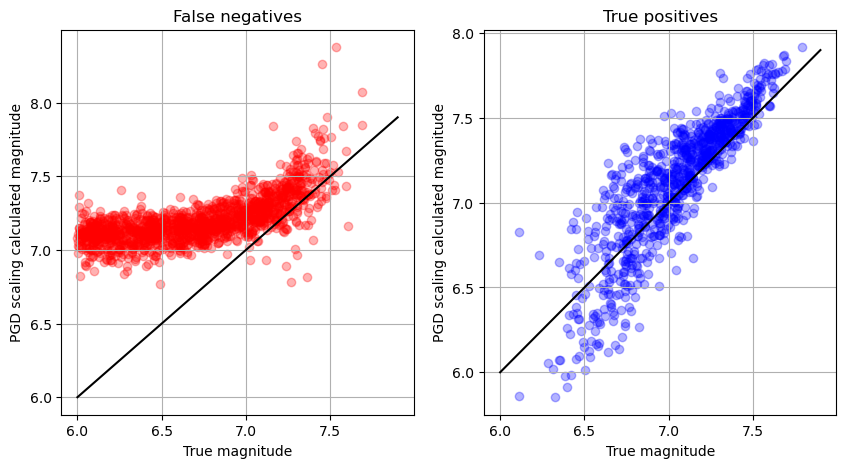

In [93]:
# Restricting event-average plot by SNR

plt.figure(figsize = (10,5), dpi = 100)

x = np.arange(6,8,0.1)

plt.subplot(121)
plt.grid()
plt.scatter(true_mws, calc_mws_fn, color = 'red', alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')
plt.title('False negatives')

plt.subplot(122)
plt.grid()
plt.scatter(true_mws, calc_mws_tp, color = 'blue', alpha = 0.3)
plt.plot(x, x, color = 'black')
plt.xlabel('True magnitude')
plt.ylabel('PGD scaling calculated magnitude')
plt.title('True positives')

plt.show();